In [1]:
set.seed(999)
options(repr.plot.width = 10, repr.plot.height = 8, warn = -1) 
library(tidyverse)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
install.packages("ggtext")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [3]:
library(ggtext)

In [4]:
North <- c("MG","ME", "MT","MG","ME", "MT","MG","ME", "MT","MG")
South <- c("ME","ME", "ME","MG","ME", "ME","MG","ME", "MT","MG")
East <- c("MG","MG", "MT","MG","MG", "MG","MG","ME", "MT","MG")
West <- c("MT","MT", "MT","MG","ME", "MT","MT","ME", "MT","MG")

df <- data.frame(North, South, East, West)

data <- df %>%
    pivot_longer(cols = North:West,
                 names_to = 'Location',
                 values_to = 'Species') %>%
    group_by(Location, Species)%>%
    summarize(n=n())

data

`summarise()` has grouped output by 'Location'. You can override using the
`.groups` argument.


Location,Species,n
<chr>,<chr>,<int>
East,ME,1
East,MG,7
East,MT,2
North,ME,3
North,MG,4
North,MT,3
South,ME,6
South,MG,3
South,MT,1


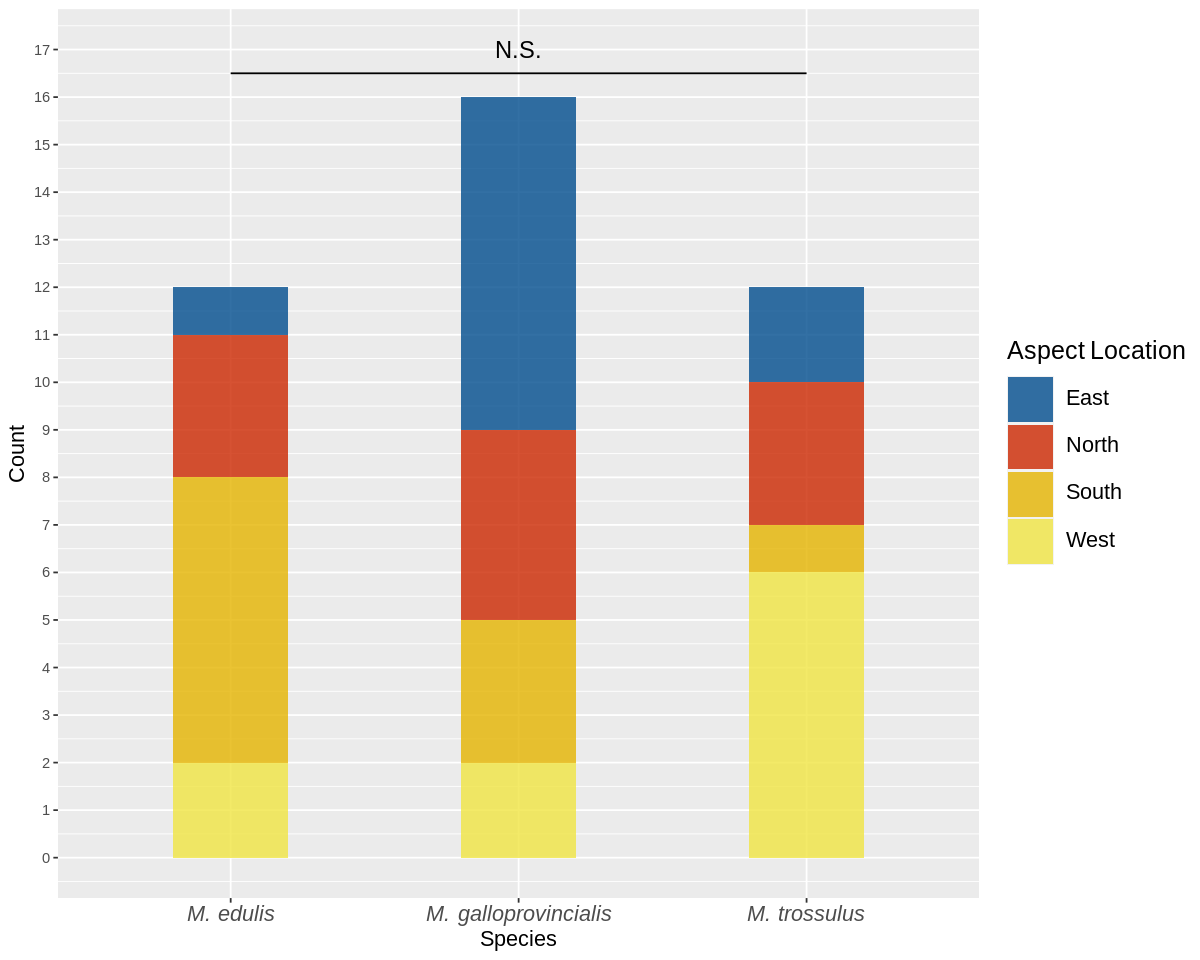

In [5]:
col <- c("#004d8d", "#cc2701", "#e5b400",'#f0e442')


f.plot <- data %>%
    ggplot(aes(x = Species, y = n, fill = Location)) +
    geom_bar(stat = 'identity', alpha = 0.8, width = 0.4, position = "stack") +
    labs(x= "Species", y = "Count", fill = "Aspect Location") + 
    scale_x_discrete(labels = c("*M. edulis*", "*M. galloprovincialis*","*M. trossulus*")) +
    scale_y_continuous(breaks=seq(0,20,1)) +  
    scale_fill_manual(values = col) +
    # scale_fill_manual(values = col, labels = c("*M. edulis*", "*M. galloprovincialis*","*M. trossulus*")) +
    geom_line(data = tibble(x = c(1,3), y=c(16.5, 16.5)), aes(x=x, y=y), inherit.aes = FALSE) +
    geom_text(data = tibble(x = c(2), y=c(17)), aes(x=x, y=y, label = "N.S."), size = 5, inherit.aes = FALSE) +
    theme(legend.text = element_markdown(size = 13), legend.key.size = unit(1, 'cm'), legend.title = element_markdown(size=15), axis.text.x=element_markdown(size=13), axis.title=element_text(size=13))

#M. galloprovincialis > M. edulis > M. trossulus
# theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=18),  legend.text= element_text(size=12), axis.text=element_text(size=20), axis.title=element_text(size=22))
f.plot


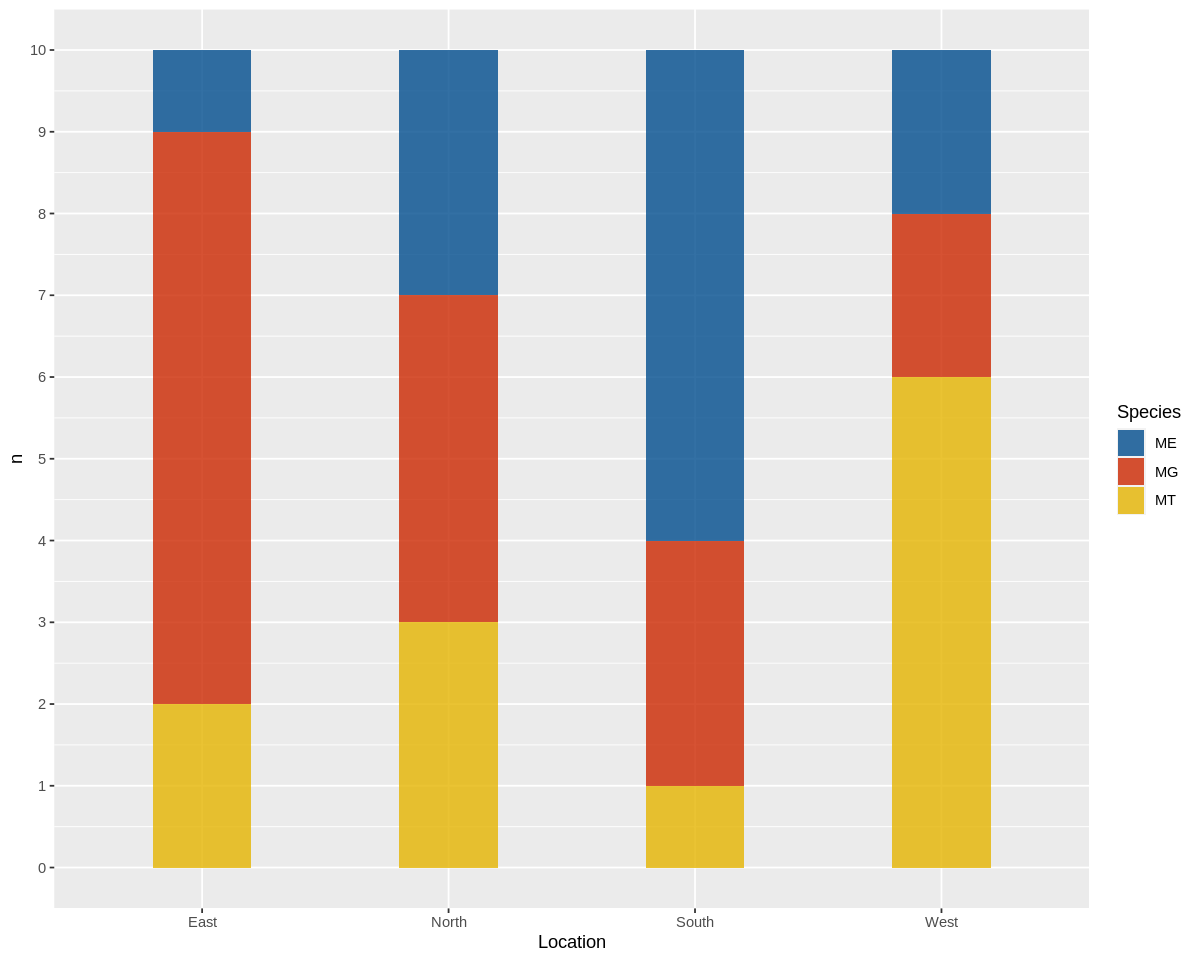

In [20]:
col <- c("#004d8d", "#cc2701", "#e5b400",'#f0e442')


fl.plot <- data %>%
    ggplot(aes(x = Location, y = n, fill = Species)) +
    geom_bar(stat = 'identity', alpha = 0.8, width = 0.4, position = "stack") +
scale_y_continuous(breaks=seq(0,20,1)) +  
    scale_fill_manual(values = col) 
    # scale_fill_manual(values = col, labels = c("*M. edulis*", "*M. galloprovincialis*","*M. trossulus*")) 
#M. galloprovincialis > M. edulis > M. trossulus
# theme(legend.key.size = unit(1, 'cm'), legend.title = element_text(size=18),  legend.text= element_text(size=12), axis.text=element_text(size=20), axis.title=element_text(size=22))
fl.plot


In [6]:
data5 <- data %>%
pivot_wider(names_from = Species, 
            values_from = n) 

df <- data.frame("ME" = c(1,3,6,2), "MG"=c(7,4,3,2), "MT" = c(2,3,1,6), row.names = c('East','North','South','West'))

In [7]:
data2 <- data %>%
pivot_wider(names_from = Location, 
            values_from = n) 

df <- data.frame("East" = c(1,7,2), "North"=c(3,4,3), "South" = c(6,3,1), "West" = c(2,2,6), row.names = c('ME','MG','MT'))

In [8]:
# doing 6 combination
#"East" = c(1,7,2),  A
#"North" = c(3,4,3), B
#"South" = c(6,3,1), C
# "West" = c(2,2,6)  D

df1 <- data.frame("East" = c(1,7,2), "North" = c(3,4,3), row.names = c('ME','MG','MT'))
df2 <- data.frame("East" = c(1,7,2), "South" = c(6,3,1), row.names = c('ME','MG','MT'))
df3 <- data.frame("East" = c(1,7,2), "West" = c(2,2,6), row.names = c('ME','MG','MT'))
df4 <- data.frame("North" = c(3,4,3), "South" = c(6,3,1), row.names = c('ME','MG','MT'))
df5 <- data.frame("North" = c(3,4,3), "West" = c(2,2,6), row.names = c('ME','MG','MT'))
df6 <- data.frame("South" = c(6,3,1), "West" = c(2,2,6), row.names = c('ME','MG','MT'))

fisher.test(df)

pairwise_fisher_test(as.matrix(df1),p.adjust.method = 'fdr')
pairwise_fisher_test(as.matrix(df2),p.adjust.method = 'fdr')
pairwise_fisher_test(as.matrix(df3),p.adjust.method = 'fdr')
pairwise_fisher_test(as.matrix(df4),p.adjust.method = 'fdr')
pairwise_fisher_test(as.matrix(df5),p.adjust.method = 'fdr')
pairwise_fisher_test(as.matrix(df6),p.adjust.method = 'fdr')




	Fisher's Exact Test for Count Data

data:  df
p-value = 0.07628
alternative hypothesis: two.sided


ERROR: Error in pairwise_fisher_test(as.matrix(df1), p.adjust.method = "fdr"): could not find function "pairwise_fisher_test"


In [ ]:
# doing 3 combination
df <- data.frame("ME" = c(1,3,6,2), "MG"=c(7,4,3,2), "MT" = c(2,3,1,6), row.names = c('East','North','South','West'))

#"ME" = c(1,3,6,2), 
#"MG"=c(7,4,3,2), 
#"MT" = c(2,3,1,6)
  

dft1 <- data.frame("ME" = c(1,3,6,2), "MG"=c(7,4,3,2), row.names = c('East','North','South','West'))
dft2 <- data.frame("ME" = c(1,3,6,2), "MT" = c(2,3,1,6), row.names = c('East','North','South','West'))
dft3 <- data.frame("MG"= c(7,4,3,2), "MT" = c(2,3,1,6), row.names = c('East','North','South','West'))

fisher.test(df)

pairwise_fisher_test(as.matrix(dft1),p.adjust.method = 'fdr')
pairwise_fisher_test(as.matrix(dft2),p.adjust.method = 'fdr')
pairwise_fisher_test(as.matrix(dft3),p.adjust.method = 'fdr')
